Intention: Practice using \*args and \*\*kwargs 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets

In [21]:
from utils.plotter import plot

In [3]:
import awkward as ak

In [4]:
import numpy as np

In [4]:
def get_p4(pt, eta, phi, m):
    return vector.obj(pt=pt, eta=eta, phi=phi, m=m)

def sum_p4s(*args):
    n = len(args)
    if n == 1: return args
    else:
        p4 = args[0]
        for arg in args[1:]:
            p4 += arg
    return p4

In [165]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])

41657


In [169]:
np.asarray([len(jet_pt) for jet_pt in signal_tree.jet_pt])

array([7, 6, 9, ..., 8, 6, 8])

In [166]:
signal_p4 = signal_tree.get_pair_p4()

In [164]:
signal_p4[0]+signal_p4[1]

vector.obj(pt=[[151, 151, 151, 151, 151, 151, 105], ... 137, 102, 102, 102, 102, 102, 102, 100]], phi=[[-0.785, -0.785, -0.785, -0.785, -0.785, ... -1.55, -1.55, -1.55, -1.55, -0.43]], eta=[[0.522, 0.522, 0.522, 0.522, 0.522, ... -0.138, -0.138, -0.138, -0.138, 0.0209]], mass=[[21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 7.01, ... 16.6, 16.6, 16.6, 16.6, 16.6, 13.1]])

In [155]:
jet_pt = ak.unzip(ak.combinations(signal_tree.jet_pt, 2))

In [158]:
jet_pt[0]

<Array [[151, 151, 151, ... 54.2, 54.2, 23.7]] type='41657 * var * float32'>

In [143]:
jet1_pt, jet2_pt = ak.unzip(ak.combinations(signal_tree.jet_pt, 2))
jet1_eta, jet2_eta = ak.unzip(ak.combinations(signal_tree.jet_eta, 2))
jet1_phi, jet2_phi = ak.unzip(ak.combinations(signal_tree.jet_phi, 2))
jet1_m, jet2_m = ak.unzip(ak.combinations(signal_tree.jet_m, 2))

jet1_p4 = vector.obj(
    pt  = jet1_pt,
    eta = jet1_eta,
    phi = jet1_phi,
    m   = jet1_m)

jet2_p4 = vector.obj(
    pt  = jet2_pt,
    eta = jet2_eta,
    phi = jet2_phi,
    m   = jet2_m)

signal_min_dR = ak.min(jet1_p4.deltaR(jet2_p4), axis=1).to_numpy().data

In [149]:
n_sig, b = np.histogram(signal_min_dR, bins=np.linspace(0,2,100))

In [150]:
bkgd_dR_weights = []
for i,sample in enumerate(bkgd_tree.sample):
    tree = getattr(bkgd_tree, sample)
    jet1_pt, jet2_pt = ak.unzip(ak.combinations(tree.jet_pt, 2))
    jet1_eta, jet2_eta = ak.unzip(ak.combinations(tree.jet_eta, 2))
    jet1_phi, jet2_phi = ak.unzip(ak.combinations(tree.jet_phi, 2))
    jet1_m, jet2_m = ak.unzip(ak.combinations(tree.jet_m, 2))

    jet1_p4 = vector.obj(
        pt  = jet1_pt,
        eta = jet1_eta,
        phi = jet1_phi,
        m   = jet1_m)

    jet2_p4 = vector.obj(
        pt  = jet2_pt,
        eta = jet2_eta,
        phi = jet2_phi,
        m   = jet2_m)

    bkgd_min_dR = ak.min(jet1_p4.deltaR(jet2_p4), axis=1).to_numpy().data
    n, b = np.histogram(bkgd_min_dR, bins=np.linspace(0,2,100))
    n = n*bkgd_tree.scale[i]
    bkgd_dR_weights.append(n)
bkgd_dR_weights = np.sum(np.asarray(bkgd_dR_weights), axis=0)

In [151]:
x = (b[1:]+b[:-1])/2

In [146]:
import matplotlib.pyplot as plt

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

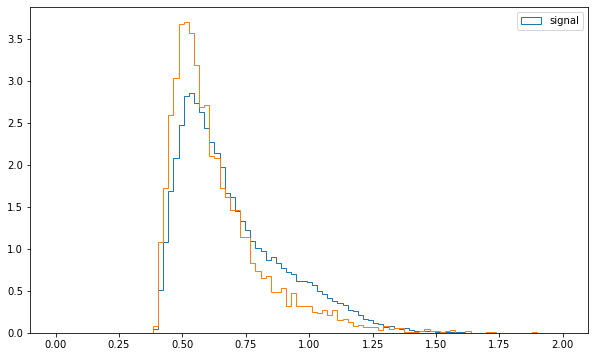

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
plot(x=x, bins=b, weights=n_sig, label='signal', fig=fig, ax=ax, density=1)
plot(x=x, bins=b, weights=bkgd_dR_weights, density=1, fig=fig, ax=ax)


In [112]:
jet1_p4.deltaR(jet2_p4)

<Array [[3.04, 3.12, 1.89, ... 0.651, 1.74]] type='41657 * var * float32'>

<Array [0.557, 1.26, 0.507, ... 0.824, 0.651] type='41657 * ?float32'>

In [97]:
ak.unzip(ak.flatten(jet_pt))

(<Array [151, 151, 151, ... 54.2, 54.2, 23.7] type='1003703 * float32'>,
 <Array [105, 86, 24.9, ... 23.7, 29.5, 29.5] type='1003703 * float32'>)

In [77]:
import vector

Text(0.5, 0, 'Jet $p_T$ [GeV]')

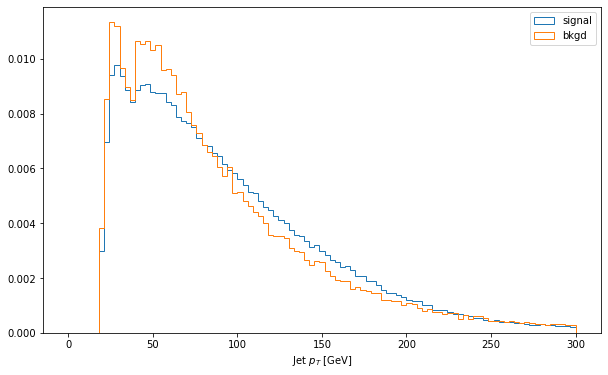

In [68]:
n, b, c = signal_tree.get_hist_weights('jet_pt')
fig, ax = plot(x=c, weights=n, bins=b, label='signal', density=1)
n, b, c = bkgd_tree.get_hist_weights('jet_pt')
plot(x=c, weights=n, bins=b, label='bkgd', fig=fig, ax=ax, density=1)
ax.set_xlabel(r'Jet $p_T$ [GeV]')

Text(0.5, 0, 'Jet $p_T$ [GeV]')

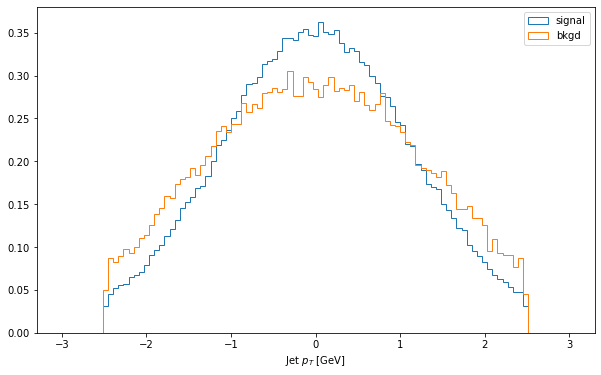

In [73]:
n, b, c = signal_tree.get_hist_weights('jet_eta')
fig, ax = plot(x=c, weights=n, bins=b, label='signal', density=1)
n, b, c = bkgd_tree.get_hist_weights('jet_eta')
plot(x=c, weights=n, bins=b, label='bkgd', fig=fig, ax=ax, density=1)
ax.set_xlabel(r'Jet $p_T$ [GeV]')

In [61]:
np.sum(n, axis=0).shape

(99,)

In [16]:
signal_tree.jet_pt

<Array [[151, 105, 86, ... 54.2, 23.7, 29.5]] type='41657 * var * float32'>

In [45]:
bkgd_tree.weighted_n

array([ 2342.30109504, 81042.48553411, 54124.8819788 , 22191.72474075,
        6071.82817838,   654.93472885,   119.15968762,   355.65277752,
       20952.84459411, 22330.68103515, 12975.02903384,  4239.7143315 ,
         643.81071617,   173.64966186, 62678.66899767])

In [46]:
np.sum(bkgd_tree.weighted_n)

290897.3670913554

In [21]:
np.sum(bkgd_tree.nevents)

432304

In [27]:
lumi = 59740

In [36]:
len(bkgd_tree.nevents)

15

In [34]:
np.sum(bkgd_tree.scale*bkgd_tree.total)

14536579972.787998

In [25]:
np.sum(bkgd_tree.scale*bkgd_tree.nevents)

290897.3670913554

In [39]:
goal = 1574868.8687196115

In [43]:
np.asarray(bkgd_tree.nevents)*bkgd_tree.scale

array([ 2342.30109504, 81042.48553411, 54124.8819788 , 22191.72474075,
        6071.82817838,   654.93472885,   119.15968762,   355.65277752,
       20952.84459411, 22330.68103515, 12975.02903384,  4239.7143315 ,
         643.81071617,   173.64966186, 62678.66899767])

In [42]:
bkgd_tree.scale/lumi

array([4.35647267e-03, 1.48423045e-03, 1.60810685e-04, 3.59953285e-04,
       3.50232825e-05, 2.59911937e-06, 1.60987750e-06, 5.95334412e-03,
       1.77138345e-03, 3.71199412e-04, 1.21268368e-04, 7.07571683e-05,
       2.66095763e-05, 1.01634859e-05, 2.54865237e-06])